<br><h1 align="Center"> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="60" width="200" align="Center" />MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II</h1>
<h2 align="Center">
Presentado por:<br>
Fabián Cholo Acevedo - Cód 201523509<br>
Jaime Orjuela Viracacha - Cód 201924252<br>
</h2>

# Introducción a Sistemas de Recomendación

## Actividad 10


### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)


**Instrucciones:** Por favor escriba los nombres de los integrantes de su grupo. Esta actividad debe ser entregada a más tardar dentro de 8 días, con la respuesta para los ejercicios y preguntas en cada numeral.

En este cuadernos estudiaremos una primera introducción a los sistemas de recomendación, examinando un modelo de recomendación en base a la popularidad, sin ningún grado de personalización. En futuras actividades exploraremos otros sistemas basados en contenido o en filtrado colaborativo, los cuales toman en cuenta las preferencias de los usuarios. 

Los sistemas de recomendación están entre las aplicaciones más populares de la ciencia de datos actualmente. El marco que ofrecen estos sistemas permite representar modelos de decisión junto con métodos estadístico/computacionales para **aprender y estimar** las preferencias de los usuarios. 


## Introducción

En esta introducción vamos a construir un modelo simple basado en popularidad. Aprenderemos nociones que nos permitirán construir modelos más complejos de recomendación. 

En este cuaderno vamos a trabajar con una base de datos de películas IMDB (https://www.imdb.com/) 

En términos generales, los sistemas de recomendación pueden clasificarse en 3 tipos:

- **Recomendadores simples:** genera recomendaciones para cada usuario según la popularidad del ítem o producto. Por ejemplo, proponer películas o un género en base a su popularidad o su crítica, donde una buena crítica aproxima una mayor probabilidad de que la película sea apreciada por una audiencia "promedio".
- **Recomendadores basados en contenido:** sugiere elementos similares en función de un elemento en particular, como por ejemplo el género, la sinopsis o el reparto (actores, etc). De esta manera, si el usuario tiene unas preferencias específicas sobre un ítem/artículo en particular, también podría tener preferencia por un ítem *similar*.
- **Recomendadores por filtrado colaborativo:** estos sistemas generan recomendaciones a partir de similitudes entre usuarios, prediciendo la calificación o preferencia de un usuario sobre un ítem, o un grupo de atributos de dicho ítem, según las calificaciones y preferencias observadas de otros usuarios. 

Por último se puede considerar también un cuarto tipo de recomendadores, que son los de tipo **Híbrido**. Estos hacen referencia al uso simultaneo de las distintas metodologias antes señaladas y de múltiples fuentes de información o tecnologías específicas, como pueden ser las redes sociales o fuentes de información geográfica, demográfica, etc.

Para profundizar en los sistemas de recomendación se pueden consultar las siguientes fuentes:
- Ch. Aggarwal. Recommender Systems. Springer, 2016.
- J. Leskovec, A. Rajaraman, J. Ullman. Mining of Massive Datasets. Cambridge University Press (http://www.mmds.org/)


## 1. Sistema de recomendación simple

Los recomendadores simples generan recomendaciones basadas en su popularidad, de acuerdo con una *preferencia promedio*. 

La pregunta es,

**¿cómo medimos la popularidad de un producto/ítem?**

Una opción es la de elegir una métrica determinada para puntuar las películas, y en base a esa métrica generar un valor de preferencia por el ítem. De esta manera es posible consturir un *orden lineal* o un *ranking estricto* con las mejores películas de la base de datos IMDB.

Pasos a seguir:
- Elegir la métrica con la que se va a calificar cada película. Este punto también se puede entender como un modelo para estimar las preferencias por una película.
- Calcular el valor de preferencia sobre cada película.
- Ordenar las películas según su valor o puntuación y obtener una lista con las mejores k peliculas.

Manos a la obra, primero carguemos el conjunto de datos como un data frame en la bilbioteca Pandas:

In [1]:
# Importamos la biblioteca Pandas
import pandas as pd

# Cargamos los datos de peliculas de la base de datos IMDB
metadata = pd.read_csv('movies_metadata.csv', low_memory=False)

print(metadata.shape)
      
list(metadata)


(45466, 24)


['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [2]:
# Así se ven los datos
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
metadata[['original_title', 'popularity']][1:10]

,original_title,popularity
1,Jumanji,17.015539
2,Grumpier Old Men,11.7129
3,Waiting to Exhale,3.859495
4,Father of the Bride Part II,8.387519
5,Heat,17.924927
6,Sabrina,6.677277
7,Tom and Huck,2.561161
8,Sudden Death,5.23158
9,GoldenEye,14.686036


### Rating vs. Popularidad

Con esta información vamos a construir un sistema que recomiende películas basados directamente en su *rating*, o **voto promedio**. Sin embargo, es cierto que hay otro atributo relevante como lo es el de su **popularidad**. Por ejemplo, si un solo usuario califica con 10 una pelicula, pero 5000 usuarios le dan en promedio un 8.3, solo en base al rating la primera película sería considerada mejor que la segunda.


Bajo una perspectiva de *los grandes números*, la valoración o voto promedio de una película tiende a converger hacia un valor que refleje la calidad de la película a medida que el número de votos aumenta. Con poca información, o pocos votos, es más difícil estimar la calidad promedio de la película.  


Entonces, 

**¿qué tipo de métrica nos sirve para evaluar apropiadamente la preferencia por una película?** 

Tengamos en cuenta que en base a esta métrica se tendrán mejores o peores recomendaciones!




### Ejercicio 1.1

Examine los datos y proponga una métrica que permita estimar la preferencia promedio por una película.

In [5]:
metadata[['original_title', 'popularity','vote_average','vote_count','popularity']][1:10]

,original_title,popularity,vote_average,vote_count,popularity
1,Jumanji,17.015539,6.9,2413.0,17.015539
2,Grumpier Old Men,11.7129,6.5,92.0,11.7129
3,Waiting to Exhale,3.859495,6.1,34.0,3.859495
4,Father of the Bride Part II,8.387519,5.7,173.0,8.387519
5,Heat,17.924927,7.7,1886.0,17.924927
6,Sabrina,6.677277,6.2,141.0,6.677277
7,Tom and Huck,2.561161,5.4,45.0,2.561161
8,Sudden Death,5.23158,5.5,174.0,5.23158
9,GoldenEye,14.686036,6.6,1194.0,14.686036


In [6]:
metadata['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [7]:
metadata['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [8]:
metadata['popularity'].describe()

count     45461
unique    43758
top         0.0
freq         66
Name: popularity, dtype: object

In [9]:
metadata['popularity'] = pd.to_numeric(metadata.popularity, errors='coerce')

Teniendo en cuenta que la variable popularidad es de tipo object, se convierte en numérica para probar una regresión lineal

In [10]:
metadata['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [ ]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

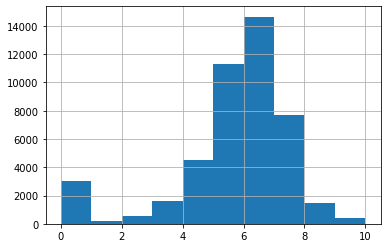

In [15]:
# Visualizamos rápidamente las caraterísticas de entrada
metadata['vote_average'].hist()

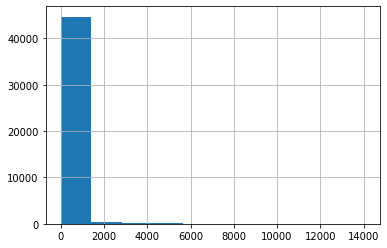

In [16]:
metadata['vote_count'].hist()

In [39]:
df = metadata[metadata['vote_count']<200.00]

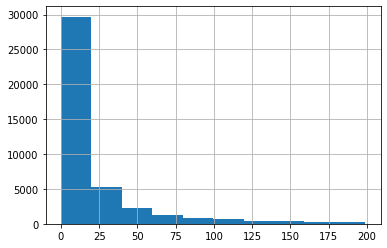

In [40]:
df['vote_count'].hist()

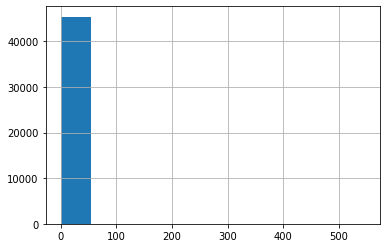

In [43]:
metadata['popularity'].hist()

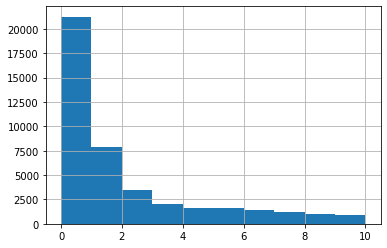

In [45]:
df = metadata[metadata['popularity']<10.00]
df['popularity'].hist()

Se nota que la mayoría de peliculas tienen muy pocos votos (menos de 75), por lo que las variables <i>vote_average</i> y <i>vote_count</i> deben ser consideradas con precaución

In [47]:
metadata['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

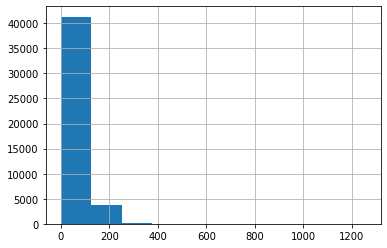

In [48]:
metadata['runtime'].hist()

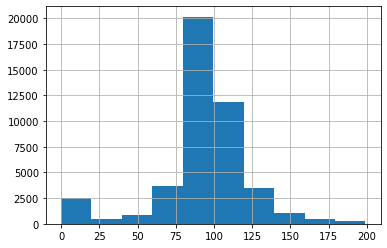

In [51]:
df = metadata[metadata['runtime']<200.00]
df['runtime'].hist()

In [49]:
metadata['revenue'].describe()

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

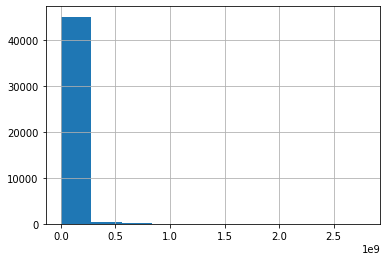

In [50]:
metadata['revenue'].hist()

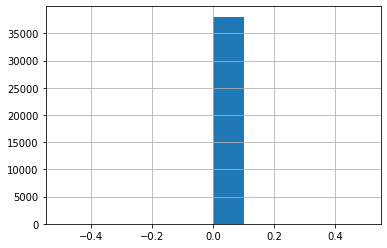

In [58]:
df = metadata[metadata['revenue']<1]
df['revenue'].hist()

Después del análisis realizado se concluye que la variable candidata para realizar una recomendación es la variable de popularida: <i>popularity</i>.

### Ponderación entre rating y popularidad

Una opción puede consistir en ponderar el rating que recibe una película por su número de votos. De esta manera se pueden prevenir situaciones donde una película con un voto de 10 obtenga una mejor calificación que una película con 1000 votos con un promedio de 9.5.  

De esta manera, el voto promedio ponderado $\mu_i$, de la $i$-ésima película lo definimos como:

$$
\mu_i  = \left( \frac{v_i}{v_{max}} \right) R_i 
$$

donde $v_i$ es el número de votos para la $i$-ésima película, $v_{max}$ es el máximo número de votos que recibe la película más popular, y $R$ es el rating promedio de la pelicula.


En la base de datos tenemos los valores de $v_i$ (vote_count) y $R$ (vote_average) para cada pelicula. Además podemos agregar un filtro para que considere las películas con un minimo número de votos $v_{min}$.


Nos quedamos con las columnas necesarias para calcular el rating ponderado más el link de la pagina (en caso de que esté disponible):

In [59]:
pelisR = metadata[['original_title', 'homepage', 'vote_count', 'vote_average']]
pelisR.shape


(45466, 4)

In [60]:
# Calificacion de peliculas basada en la ponderacion de su rating 
def rating_ponderado(x):
    """
    Input:
    x: datos de rating y votacion de las peliculas
    m: minimo numero de votos
    Output:
    rating ponderado
    """
    m = x['vote_average'].max()
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) 

Definimos una nueva respuesta 'score' y calculamos su valor con la funcion rating_ponderado().

A continuación ordenamos las películas basados en el score y ofrecemos el top 15 de películas preferidas:

In [61]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

# si tiene al menos vmin votos, incluimos la pelicula
vmin = 1
pelisRF = pelisR.copy().loc[pelisR['vote_count'] >= vmin]
pelisRF['score'] = rating_ponderado(pelisRF)

# ordenamos las peliculas de acuerdo con el score
pelisRF = pelisRF.sort_values('score', ascending=False)

# Mostramos el top15 de las peliculas
pelisRF[['original_title', 'homepage', 'vote_count', 'vote_average', 'score']].head(15)

,original_title,homepage,vote_count,vote_average,score
10309,Dilwale Dulhania Le Jayenge,NaN,661.0,9.1,8.964382
314,The Shawshank Redemption,NaN,8358.0,8.5,8.489842
834,The Godfather,http://www.thegodfather.com/,6024.0,8.5,8.485913
40251,君の名は。,https://www.funimationfilms.com/movie/yourname/,1030.0,8.5,8.418269
39085,Planet Earth,NaN,176.0,8.8,8.326882
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,8.293240
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,8.291433
292,Pulp Fiction,NaN,8670.0,8.3,8.290438
522,Schindler's List,http://www.schindlerslist.com/,4436.0,8.3,8.281332
23673,Whiplash,http://sonyclassics.com/whiplash/,4376.0,8.3,8.281076


In [63]:
pelisRF['score'].describe()

count    42561.000000
mean         3.292475
std          1.944585
min          0.000000
25%          1.615385
50%          3.076923
75%          4.855102
max          8.964382
Name: score, dtype: float64

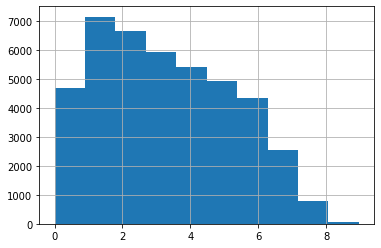

In [64]:
pelisRF['score'].hist()

Examinemos el efecto de cambiar el mínimo numero de votos a considerar:

In [65]:
# si tiene al menos mil votos incluimos la pelicula
vmin = 1000
pelisRF = pelisR.copy().loc[pelisR['vote_count'] >= vmin]
pelisRF['score'] = rating_ponderado(pelisRF)

# ordenamos las peliculas de acuerdo con el score
pelisRF = pelisRF.sort_values('score', ascending=False)

# Mostramos el top15 de las peliculas
pelisRF[['original_title', 'homepage', 'vote_count', 'vote_average', 'score']].head(15)

,original_title,homepage,vote_count,vote_average,score
314,The Shawshank Redemption,NaN,8358.0,8.5,8.491364
834,The Godfather,http://www.thegodfather.com/,6024.0,8.5,8.488023
40251,君の名は。,https://www.funimationfilms.com/movie/yourname/,1030.0,8.5,8.430429
12481,The Dark Knight,http://thedarkknight.warnerbros.com/dvdsite/,12269.0,8.3,8.294254
2843,Fight Club,http://www.foxmovies.com/movies/fight-club,9678.0,8.3,8.292717
292,Pulp Fiction,NaN,8670.0,8.3,8.291871
522,Schindler's List,http://www.schindlerslist.com/,4436.0,8.3,8.284126
23673,Whiplash,http://sonyclassics.com/whiplash/,4376.0,8.3,8.283909
5481,千と千尋の神隠し,http://movies.disney.com/spirited-away,3968.0,8.3,8.282258
2211,La vita è bella,NaN,3643.0,8.3,8.280679


In [66]:
pelisRF.shape

(1121, 5)

<p style="color:brown">Con el restrictor de incluir sólo las películas que tuvieran más de 100 votos, Se incluyeron 1121 peliculas de 45466, es decir tan solo el 2,5% de los datos!!!</p>

Veamos en qué consiste esa pelicula en japonés:

In [67]:
import webbrowser
webbrowser.open(pelisRF['homepage'][40251]) 

True

<a href="https://es.wikipedia.org/wiki/Kimi_no_Na_wa">Tomado de wikipedia</a>

Kimi no Na wa. (君の名は。 lit. Tu nombre?) es una película de animación japonesa estrenada en 2016; escrita y dirigida por Makoto Shinkai, animada por CoMix Wave Films y distribuida por Tōhō.2​ La película está inspirada en la novela del mismo nombre escrita por Shinkai que fue publicada el 18 de junio de 2016.3​4​ Masayoshi Tanaka fue el diseñador de personajes y la banda japonesa Radwimps compuso la música de la película. Se estrenó en la convención Anime Expo 2016 en Los Ángeles el 3 de julio de 2016 y más tarde se estrenó en Japón el 26 de agosto del mismo año.5​6​7​ En la Anime Expo 2016 también se anunció que la película había sido licenciada por Funimation.8​ Su estreno europeo fue durante el Festival Internacional de Cine de San Sebastián, el día 22 de septiembre de 2016.9​10​ Selecta Visión adquirió los derechos para distribuirla en España a partir de enero de 2017. Por su parte, KEM Media adquirió los derechos de distribución para Latinoamérica desde agosto del mismo año.

Los protagonistas, Taki y Mitsuha, son dos completos desconocidos, y a pesar de eso están destinados a conocerse. Durante el sueño, ambos adolescentes intercambian sus cuerpos, con resultados impredecibles en la vida de ambos.11​ Mitsuha es una joven de pueblo que anhela la emoción de la vida de la ciudad. Un día, sueña con un chico tal y como desea, al mismo tiempo que el chico en cuestión, Taki, de la gran ciudad, sueña a su vez con Mitsuha, una encantadora chica del campo. Taki y Mitsuha descubren un día que durante el sueño sus cuerpos se intercambian, y comienzan a comunicarse por medio de notas. A medida que consiguen superar un reto tras otro, se va creando entre los dos un vínculo muy especial. La inconveniencia sucede cuando ambos, tras saber su conexión especial por lazos temporales (que suceden por medio de los sueños), descubren un enorme deseo de querer conocer al otro.

### Ejercicio 1.2

Examine cómo varían los resultados si tomamos directamente la variable de popularidad.

In [76]:
metadata.sort_values(by=['popularity'], ascending=False)[['original_title','popularity']].head(20)


,original_title,popularity
30700,Minions,547.488298
33356,Wonder Woman,294.337037
42222,Beauty and the Beast,287.253654
43644,Baby Driver,228.032744
24455,Big Hero 6,213.849907
26564,Deadpool,187.860492
26566,Guardians of the Galaxy Vol. 2,185.330992
14551,Avatar,185.070892
24351,John Wick,183.870374
23675,Gone Girl,154.801009


Se nota que según la popularidad, en el TOP 10 se encuentran películas infantiles

### Recomendación de peliculas mas populares por genero

In [77]:
import numpy as np
from ast import literal_eval

# trabajamos la informacion por generos
metadata['genres'] = metadata['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# añadimos la variable del año
metadata['year'] = pd.to_datetime(metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995


Primero nos quedamos con todos los generos:

In [78]:
generos = metadata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
generos.name = 'genre'
gen_md = metadata.drop('genres', axis=1).join(generos)

gen_md.head(3)

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,genre
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Animation
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Comedy
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,Family


Construimos una funcion para un género particular y que tome en cuenta peliculas con un número vmin de votos:

In [79]:
def rec_gen(genero, vmin):
    df = gen_md[gen_md['genre'] == genero]
    v = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    R = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    m = df['vote_average'].max()
    
    pelisG = df[(df['vote_count'] >= vmin) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'overview', 'homepage']]
    pelisG['vote_count'] = pelisG['vote_count'].astype('int')
    pelisG['vote_average'] = pelisG['vote_average'].astype('int')
    
    pelisG['wr'] = v/m * R
    pelisG = pelisG.sort_values('wr', ascending=False).head(250)
    
    return pelisG



Veamos el Top-15 de recomendaciones en Ciencia Ficción:

In [80]:
k = 15
scifi = rec_gen('Science Fiction', 1000)
scifi.head(15)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
15480,Inception,2010,14075,8,29.108149,"Cobb, a skilled thief who commits corporate es...",http://inceptionmovie.warnerbros.com/,11260.0
22879,Interstellar,2014,11187,8,32.213481,Interstellar chronicles the adventures of a gr...,http://www.interstellarmovie.net/,8949.6
14551,Avatar,2009,12114,7,185.070892,"In the 22nd century, a paraplegic Marine is di...",http://www.avatarmovie.com/,8479.8
17818,The Avengers,2012,12000,7,89.887648,When an unexpected enemy emerges and threatens...,http://marvel.com/avengers_movie/,8400.0
23753,Guardians of the Galaxy,2014,10014,7,53.291601,"Light years from Earth, 26 years after being a...",http://marvel.com/guardians,7009.8
26553,Mad Max: Fury Road,2015,9629,7,29.361780,An apocalyptic story set in the furthest reach...,http://www.madmaxmovie.com/,6740.3
2458,The Matrix,1999,9079,7,33.366332,"Set in the 22nd century, The Matrix tells the ...",http://www.warnerbros.com/matrix,6355.3
12588,Iron Man,2008,8951,7,22.073099,"After being held captive in an Afghan cave, bi...",http://www.ironmanmovie.com/,6265.7
18244,The Hunger Games,2012,9634,6,20.031667,Every year in the ruins of what was once North...,http://www.thehungergames.movie/,5780.4
26555,Star Wars: The Force Awakens,2015,7993,7,31.626013,Thirty years after defeating the Galactic Empi...,http://www.starwars.com/films/star-wars-episod...,5595.1


Inception e Interstellar aparecen en las dos primeras posiciones. Personalmente me gusta más Interstellar (si quieres ver un agujero negro, esta película es lo mejor que podrás conseguir), pero reconozco que Inception tiene mucho nivel. Podemos seguir refinando este tipo de recomendaciones prestando atención a los distintos atributos que tenemos disponibles sobre las películas. 


### Ejercicio 1.3

Elija el género de su interés y aplique la métrica propuesta en el Ejercicio 1.1

In [101]:
def rec_gen1(genero, vmin):
    df = gen_md[gen_md['genre'] == genero]
    
    pelisG = df[(df['vote_count'] >= vmin) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'overview', 'homepage','revenue']]
    pelisG = pelisG.sort_values('popularity', ascending=False).head(20)
    
    return pelisG

In [102]:
rec_gen1('Drama', 1000)

,title,year,vote_count,vote_average,popularity,overview,homepage,revenue
23675,Gone Girl,2014,6023.0,7.9,154.801009,With his wife's disappearance having become th...,http://www.gonegirlmovie.com/,3.693304e+08
44274,War for the Planet of the Apes,2017,1675.0,6.7,146.161786,Caesar and his apes are forced into a deadly c...,http://www.foxmovies.com/movies/war-for-the-pl...,3.699080e+08
12481,The Dark Knight,2008,12269.0,8.3,123.167259,Batman raises the stakes in his war on crime. ...,http://thedarkknight.warnerbros.com/dvdsite/,1.004558e+09
536,Blade Runner,1982,3833.0,7.9,96.272374,In the smog-choked dystopian Los Angeles of 20...,http://www.warnerbros.com/blade-runner,3.313962e+07
33361,The Circle,2017,1015.0,5.4,88.439243,A young tech worker takes a job at a greedy In...,http://wearethecircle.com/,2.049784e+07
23692,Dawn of the Planet of the Apes,2014,4511.0,7.3,75.385211,A group of scientists in San Francisco struggl...,http://www.dawnofapes.com/,7.106446e+08
23673,Whiplash,2014,4376.0,8.3,64.299990,"Under the direction of a ruthless instructor, ...",http://sonyclassics.com/whiplash/,1.309200e+07
2843,Fight Club,1999,9678.0,8.3,63.869599,A ticking-time-bomb insomniac and a slippery s...,http://www.foxmovies.com/movies/fight-club,1.008538e+08
42170,Logan,2017,6310.0,7.6,54.581997,"In the near future, a weary Logan cares for an...",http://www.foxmovies.com/movies/logan,6.168018e+08
314,The Shawshank Redemption,1994,8358.0,8.5,51.645403,Framed in the 1940s for the double murder of h...,NaN,2.834147e+07


En efecto la Película <i>Perdida</i>, es una película de drama excelente.  Aunque quedan por fuera un montón de excelentes películas <strong>no comerciales</strong> que en nuestro concepto superan las elegidas por IMDB.

In [105]:
rec_gen('Drama', 1000)

,title,year,vote_count,vote_average,popularity,overview,homepage,wr
12481,The Dark Knight,2008,12269,8,123.167259,Batman raises the stakes in his war on crime. ...,http://thedarkknight.warnerbros.com/dvdsite/,9815.2
22879,Interstellar,2014,11187,8,32.213481,Interstellar chronicles the adventures of a gr...,http://www.interstellarmovie.net/,8949.6
2843,Fight Club,1999,9678,8,63.869599,A ticking-time-bomb insomniac and a slippery s...,http://www.foxmovies.com/movies/fight-club,7742.4
20051,Django Unchained,2012,10297,7,19.785025,"With the help of a German bounty hunter, a fre...",http://unchainedmovie.com/,7207.9
314,The Shawshank Redemption,1994,8358,8,51.645403,Framed in the 1940s for the double murder of h...,NaN,6686.4
...,...,...,...,...,...,...,...,...
896,Citizen Kane,1941,1244,8,15.811921,"Newspaper magnate, Charles Foster Kane is take...",NaN,995.2
23962,If I Stay,2014,1415,7,9.659244,Based on Gayle Forman's novel of the same name...,NaN,990.5
1567,The Devil's Advocate,1997,1414,7,10.920124,A hotshot lawyer gets more than he bargained f...,NaN,989.8
12368,In Bruges,2008,1414,7,9.895652,"Ray and Ken, two hit men, are in Bruges, Belgi...",http://www.filminfocus.com/film/in_bruges,989.8


Utilizando la métrica inicial, definitivamente en nuestro concepto NO eligiriamos ninguna de las propuestas en el top 10, si a caso Citizen Kain y The Devil's Advocate.